In [32]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [33]:
def resample(image, transform):
    # Output image Origin, Spacing, Size, Direction are taken from the reference
    # image in this call to Resample
    reference_image = image
    interpolator = sitk.sitkCosineWindowedSinc
    default_value = 100.0
    return sitk.Resample(image, reference_image, transform,
                         interpolator, default_value)

In [40]:
fixed_file = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/CH1/thumbnail_cleaned/182.tif'
moving_file = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/CH1/thumbnail_cleaned/183.tif'
pixelType = sitk.sitkFloat32
fixed = sitk.ReadImage(fixed_file, pixelType)
moving = sitk.ReadImage(moving_file, pixelType)
initial_transform = sitk.CenteredTransformInitializer(fixed, 
                                                    moving, 
                                                    sitk.Euler2DTransform(), 
                                                    sitk.CenteredTransformInitializerFilter.GEOMETRY)
movingt = resample(moving,initial_transform)

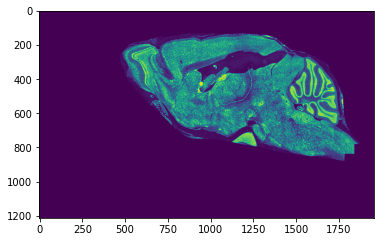

In [35]:
fixednp = sitk.GetArrayFromImage(fixed)
plt.imshow(fixednp)

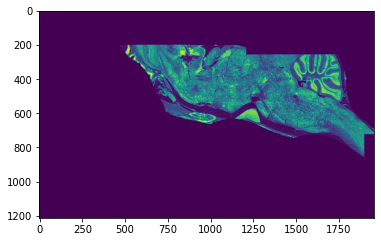

In [36]:
movingnp = sitk.GetArrayFromImage(moving)
plt.imshow(movingnp)

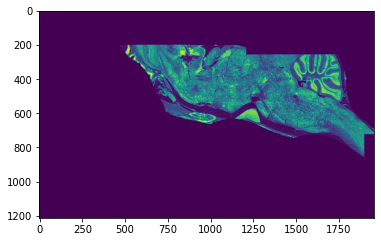

In [41]:
movingtnp = sitk.GetArrayFromImage(movingt)
plt.imshow(movingtnp)

In [38]:
moving_file

'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/CH1/thumbnail_cleaned/183.tif'

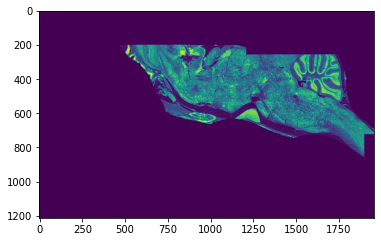

In [39]:
import tifffile
img = tifffile.imread(moving_file)
plt.imshow(img)